# Pleas read:

before your start running this jupyter notebook, please click Edit > Notebook Settings and choose any of the available GPUs.

## 0. Import Python Packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: you may import more packages below:
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## 1. Define your first network

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)

        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)

        return output

## 2. Implement training loop and test function

In [3]:
def train(model, device, train_loader, optimizer, epoch):
    losses = []
    model.train() # Set to train mode
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_hat = model(X)
        loss = F.nll_loss(y_hat, y.long())
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            print(f"Epoch {epoch} [{batch * len(X)}/{len(train_loader.dataset)}]: {loss.item()}")
            losses.append(loss.item())
    return losses

def test(model, device, test_loader):
    model.eval()
    loss = 0
    accuracy = 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(test_loader):
            X, y = X.to(device), y.to(device)
            y_hat = model(X)
            loss += F.nll_loss(y_hat, y.long(), reduction="sum").item()
            predicted = torch.argmax(y_hat, dim=1, keepdim=True)
            accuracy += predicted.eq(y.view_as(predicted)).sum().item()
    loss /= len(test_loader.dataset)
    accuracy /= len(test_loader.dataset)
    return loss, accuracy

## 3. Dataset loading


In [4]:
TRAIN = datasets.MNIST("./", train=True, transform=transforms.ToTensor(), download=True)
TEST = datasets.MNIST("./", train=False, transform=transforms.ToTensor(), download=True)

## 4. Put Everything Together

In [5]:
lr = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch = 64
epochs = 10

In [11]:
train_dl = torch.utils.data.DataLoader(TRAIN, batch_size=batch, shuffle=True)
test_dl = torch.utils.data.DataLoader(TEST, batch_size=batch, shuffle=True)
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [12]:
losses = []
for epoch in range(epochs):
    loss = train(model, device, train_dl, optimizer, epoch)
    losses.append(sum(loss) / len(loss))
test_loss, test_accuracy = test(model, device, test_dl)

Epoch 0 [0/60000]: 2.305087089538574
Epoch 0 [6400/60000]: 0.3922225832939148
Epoch 0 [12800/60000]: 0.2970618009567261
Epoch 0 [19200/60000]: 0.2581448256969452
Epoch 0 [25600/60000]: 0.13677668571472168
Epoch 0 [32000/60000]: 0.2775929272174835
Epoch 0 [38400/60000]: 0.14653092622756958
Epoch 0 [44800/60000]: 0.06676309555768967
Epoch 0 [51200/60000]: 0.030639778822660446
Epoch 0 [57600/60000]: 0.019124506041407585
Epoch 1 [0/60000]: 0.04372163489460945
Epoch 1 [6400/60000]: 0.01906421221792698
Epoch 1 [12800/60000]: 0.07022237777709961
Epoch 1 [19200/60000]: 0.0046342601999640465
Epoch 1 [25600/60000]: 0.011774079874157906
Epoch 1 [32000/60000]: 0.0632619857788086
Epoch 1 [38400/60000]: 0.01947677507996559
Epoch 1 [44800/60000]: 0.020844046026468277
Epoch 1 [51200/60000]: 0.013488433323800564
Epoch 1 [57600/60000]: 0.04208672046661377
Epoch 2 [0/60000]: 0.004069886635988951
Epoch 2 [6400/60000]: 0.019830718636512756
Epoch 2 [12800/60000]: 0.0032783448696136475
Epoch 2 [19200/60000]:

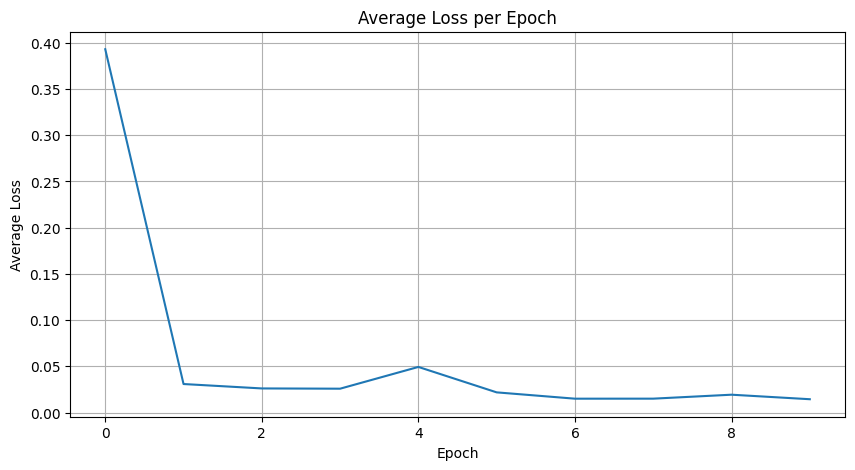

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Average Loss per Epoch")
plt.grid(True)
plt.show()

In [14]:
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.0368, Test Accuracy: 98.98%
